# E7: Introduction to Computer Programming for Scientists and Engineers

## Lab Assignment 7

For each question, you will have to fill in one or more Python functions. We provide an autograder with a number of test cases that you can use to test your function. Note that the fact that your function works for all test cases thus provided does necessarily guarantee
that it will work for all possible test cases relevant to the question. It is your responsibility
to test your function thoroughly, to ensure that it will also work in situations not covered
by the test cases provided

In [67]:
# Please run this cell, and do not modify the contets
import math
import numpy as np
import matplotlib.pyplot as plt
np.seterr(all='ignore')
from scipy import misc
from copy import deepcopy
# %run lab2_ag.py

## Question 1: Getting familiar with image files

A digital color image is a grid of colored cells called pixels. When viewed together, the pixels form an image, as shown below.

![](E7_Lab7_1.jpg)
<center>Figure 1: Jupyter logo at very low resolution. It consists of a grid of color pixels.</center>

The color of a pixel is represented with three numbers, in the range $[0, 255]$. The three
numbers correspond to the intensity of red, green, and blue, which are combined to form the
final color. For example $[0, 0, 0]$ is black, $[255, 255, 255]$ is white, $[255, 0, 0]$ is pure red, and $[255, 255, 0]$ is yellow.

A gray pixel is a pixel in which the red, blue, and green values are equal. For example, $[123, 123, 123]$ is a gray pixel, but $[0, 123, 123]$ is a sort of green-blue color. When converting a color image to a gray-scale image, one has to define the pixels of the gray-scale image such that their value is equal to the average value of the red, green, and blue intensities of that pixel in the original color image. For example, the pixel $[180, 128, 40]$ in a color image becomes $[116, 116, 166]$ on its gray-scale conversion since `np.avg(180, 128, 40)` equals $116$.

A binary image is an image that has only black and white pixels. We can obtain such an image from a grayscale image, by setting some threshold `t` between $0$ and $1$. If a pixel's grayscale value is below `255 * t`, then it is black in the binary image. Meanwhile, if a pixel's grayscale value is above `255 * t`, then it is white in the binary image.

<center>Jupyter logo as a gray-scale image</center> | <center>Jupyter logo as a binary image with threshold = $0.5$</center>
- | - 
![](E7_Lab7_2.jpg) | ![](E7_Lab7_3.jpg)

To import an image file into Python, use the following command:

```Python
img = misc.imread('my_image.png')
```

If `my_image.png` is $h$ pixels tall and $w$ pixels wide, this will assign `img` to an $h$-element array, where each element is a $w$-element array of pixels. Each pixel is itself a $3$-element array, containing values $0$ to $255$ that represent red, green, and blue intensities. For example, the array below corresponds to a $4$-pixel tall, $3$-pixel wide image where the top row is red, the second row is green, the third row is blue, and the bottom row is checkered black and white.

In [49]:
test_img = [[[255, 0, 0],   [255, 0, 0],     [255, 0, 0]],
            [[0, 255, 0],   [0, 255, 0],     [0, 255, 0]],
            [[0, 0, 255],   [0, 0, 255],     [0, 0, 255]],
            [[0, 0, 0],     [255, 255, 255], [0, 0, 0]]]

In order to display an image, using such an array as input, we have written the following function for you:

In [50]:
def display(img_array):
    plt.figure(figsize=(10, 10))
    plt.tick_params(axis='x', which='both', bottom='off', labelbottom='off')
    plt.tick_params(axis='y', which='both', left='off', labelleft='off')
    plt.imshow(np.uint8(img_array))
    plt.show()

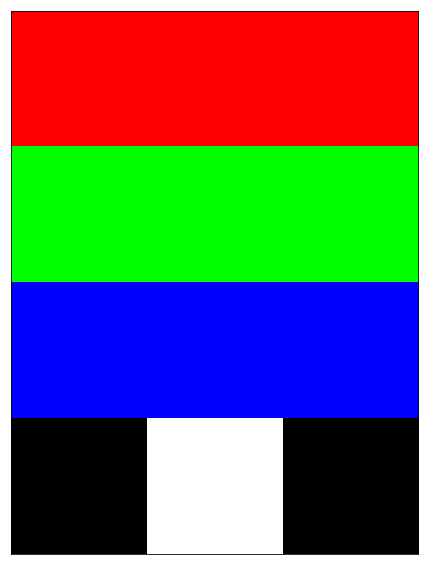

In [52]:
display(test_img) # Execute this code to test out the `display` function defined above.

### 1.1: Gray Scale

Write a Python function `grayscale(img)` that takes an $h$-tall, $w$-wide array of pixels called `img`, and returns an array of the same dimensions representing the same picture in grayscale.

In [125]:
def grayscale(img):
    img = deepcopy(img) # Copy `img`, so that we don't change the original.
    for row in img:
        for pixel in row:
            avg = np.average([pixel[0], pixel[1], pixel[2]])
            pixel[0] = pixel[1] = pixel[2] = avg
    return img

Run the cell below to test your function. It should match the image below.

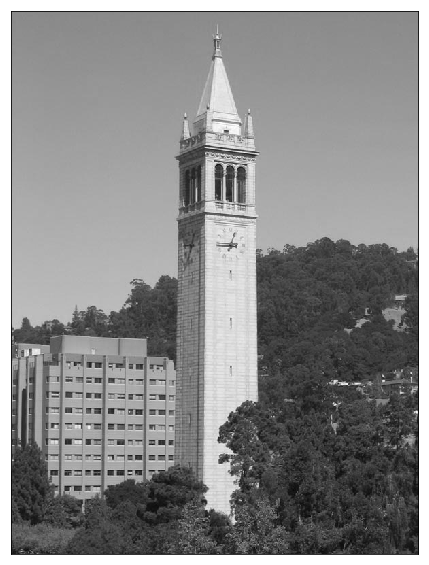

In [64]:
# Execute this code to test your function.
sather = misc.imread('sather.jpg')
gray_sather = grayscale(sather)
display(sather)

![](E7_Lab7_8.jpg)

### 1.2: Black & White

Write a function `black_and_white(img, threshold)` that takes an $h$-tall, $w$-wide array of pixels called `img`, and returns an array of the same dimensions representing the same picture in black and white. It should use the `threshold` provided, which will be a number in the range $[0, 1]$. If no `threshold` is specified, assume it is $0.5$.

In [122]:
def black_and_white(img, threshold=0.5):
    img = deepcopy(img) # Copy `img`, so that we don't change the original.
    gray_img = grayscale(img)
    for row in gray_img:
        for pixel in row:
            curr_value = pixel[0]
            black = curr_value < threshold * 255
            if black:
                pixel[0] = pixel[1] = pixel[2] = 0
            else:
                pixel[0] = pixel[1] = pixel[2] = 255
    return gray_img

Run the cell below to test your function. It should match the image below.

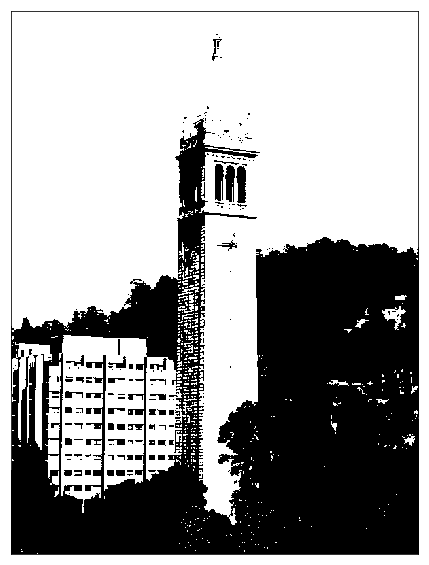

In [66]:
# Execute this code to test your function.
sather = misc.imread('sather.jpg')
black_and_white_sather = black_and_white(sather)
display(black_and_white_sather)

![](E7_Lab7_9.jpg)

### 1.3: RGB Decomposition

Write a function `RGB_decomposition(img)` that takes an $h$-tall, $w$-wide array of pixels called `img`, and returns $3$ arrays of the same dimensions. The first array returned will be the original picture, with only red pixels; the second array returned will be the original picture, with only green pixels; and the third array returned will be the original picture, with only blue pixels.

*HINT: Use the imported function `deepcopy` to construct a copy of an array.*

In [69]:
def RGB_decomposition(img):
    r_img = mask_pixels(deepcopy(img), 0)
    g_img = mask_pixels(deepcopy(img), 1)
    b_img = mask_pixels(deepcopy(img), 2)
    return r_img, g_img, b_img

def mask_pixels(img, n):
    for row in img:
        for pixel in row:
            if n == 0:
                pixel[1] = pixel[2] = 0
            elif n == 1:
                pixel[0] = pixel[2] = 0
            elif n == 2:
                pixel[0] = pixel[1] = 0
    return img

Run the cell below to test your function. They should match the images below.

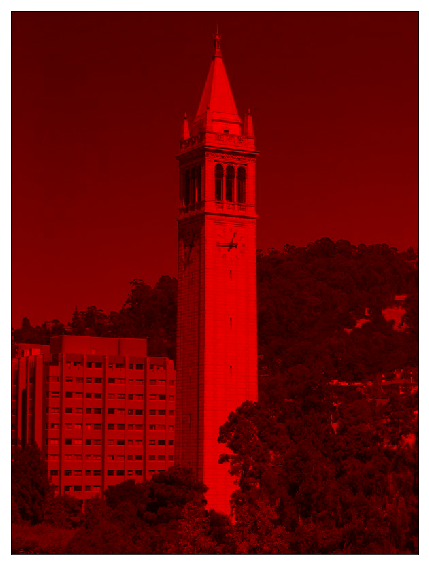

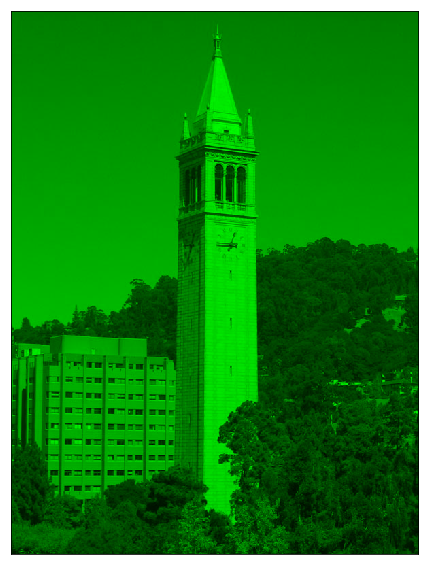

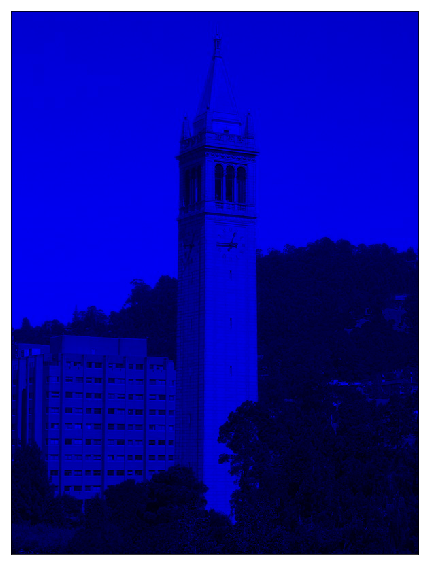

In [70]:
# Execute this code to test your function.
sather = misc.imread('sather.jpg')
r_sather, g_sather, b_sather = RGB_decomposition(sather)
display(r_sather)
display(g_sather)
display(b_sather)

<center>`r_sather`</center> | <center>`g_sather`</center> | <center>`b_sather`</center>
- | - | -
![](E7_Lab7_5.jpg) | ![](E7_Lab7_6.jpg) | ![](E7_Lab7_7.jpg)

Now write a function `reconstruct(red_img, green_img, blue_img)` that takes $3$ arrays of the same dimensions, each one representing a red, green, or blue decomposition of the same picture. It should combine them, and return the array representing the original picture.

In [126]:
def add_composites(r, g, b):
    r = deepcopy(r) # Copy `r`, so that we don't change the original.
    for y in range(len(r)):
        row = r[y]
        for x in range(len(row)):
            pixel = row[x]
            pixel[1] += g[y][x][1]
            pixel[2] += b[y][x][2]
    return r

Run the cell below to test your function. It should match the image below.

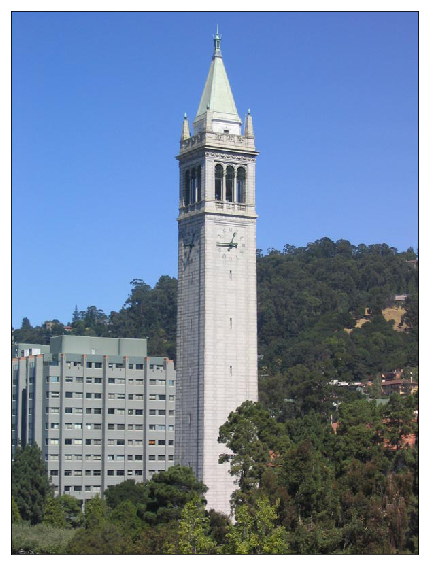

In [73]:
# Execute this code to test your function.
sather = misc.imread('sather.jpg')
r_sather, g_sather, b_sather = RGB_decomposition(sather)
reconstructed_sather = add_composites(r_sather, g_sather, b_sather)
display(reconstructed_sather)

![](E7_Lab7_4.jpg)

### 1.4: Filters

Many smartphone applications or digital cameras offer the possibility to apply filters to your pictures. Most of them are nothing more than a manipulation of the red, green, and blue pixels of the initial image. For example, a vintage filter can be obtained using the following transformation for every pixel in an image:

$$\begin{cases}
\texttt{red}_{new}   &= 0.393 * \texttt{red}_{old} + 0.769 * \texttt{green}_{old} + 0.189 * \texttt{blue}_{old} \\
\texttt{green}_{new} &= 0.349 * \texttt{red}_{old} + 0.686 * \texttt{green}_{old} + 0.168 * \texttt{blue}_{old} \\
\texttt{blue}_{new}  &= 0.272 * \texttt{red}_{old} + 0.534 * \texttt{green}_{old} + 0.131 * \texttt{blue}_{old}
\end{cases}$$

Notice that, in some cases, this transformation can return a value larger than $255$. To deal with this, we have to cap the value of each new pixel at $255$ since that is the maximum value for the intensity of a color within a pixel.

Write a function `vintage(img)` that takes an $h$-tall, $w$-wide array of pixels called `img`, and returns an array of the same dimensions, representing the same image but with a vintage filter applied to it.

In [127]:
def vintage(img):
    img = deepcopy(img) # Copy `img`, so that we don't change the original.
    for row in img:
        for pixel in row:
            r, g, b = pixel
            pixel[0] = min(255, 0.393 * r + 0.769 * g + 0.189 * b) # set new red
            pixel[1] = min(255, 0.349 * r + 0.686 * g + 0.168 * b) # set new green
            pixel[2] = min(255, 0.272 * r + 0.534 * g + 0.131 * b) # set new blue
    return img

Run the cell below to test your function. It should match the image below.

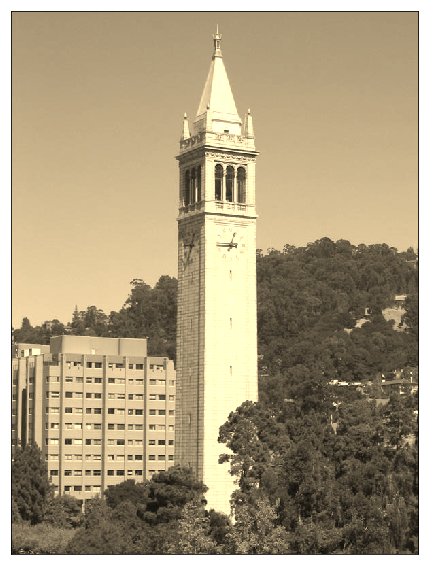

In [82]:
# Execute this code to test your function.
sather = misc.imread('sather.jpg')
vintage_sather = vintage(sather)
display(vintage_sather)

![](E7_Lab7_10.jpg)

### 1.5: Take it further: export an image you created (optional)

It is very easy to save the images you produc with Python. Assuming the array `img` represents the image you want to export, use the following command:

```Python
>>> misc.imwrite(img,'awesome_image.png')
```

It will create an image file called `'awesome_image.png'` in your working directory. Try experimenting with some different image filters and see if you can make anything really fun!

## Question 2: Land Use Changes

Thanks to the satellites that have been orbiting the Earth for several decades now, it is possible to accurately classify land use -- whether urban, forest, or farmland -- as well as the evolution of such areas over the years. For example, the images below illustrate the impact of deforestation in an $88.9$-kilometer-wide region of the Brazilian state Rondonia.

<center>Satellite image of a region in Brazil in 1985.</center> | <center>Satellite image of the same region in 2015.</center>
- | - 
![](E7_Lab7_13.jpg) | ![](E7_Lab7_14.jpg)

### 2.1: Computing NDVI

NDVI, or the Normalized Difference Vegetation Index, is a standard way of visualizing the health of vegation in an area. To calculate it, we require two images: one RGB image of the area, and one NIR image of the same area. NIR stands for near-infrared, and captures information about the vitality of green vegetation. You can read more about it <a href='https://en.wikipedia.org/wiki/Normalized_Difference_Vegetation_Index'>here</a>.

You can use the formula below to calculate the NDVI for each pixel. $RGB_{\texttt{red}}$ represents the value of the red pixel in the RGB image, and $NIR_{\texttt{red}}$ represents the value of the red pixel in the near-infrared image.

$$NDVI = \dfrac{NIR_{\texttt{red}} - RGB_{\texttt{red}}}{NIR_{\texttt{red}} + RGB_{\texttt{red}}}$$

This will return a number in the interval $[-1, 1]$, which we will map to the interval $[0, 255]$ using the mapping $f(x) = \max(0, 255 \cdot x)$. Also be sure not to divide by zero: i.e. your denominator should be lower-bounded by $1$.

Write a function `NDVI(RGB_img, NIR_img)` that takes two $h$-tall, $w$-wide array of pixels. The first one, `RGB_img`, represents the visible image of the area. The second one, `NIR_img`, represents the near-infrared image of the area. Your function should return a grayscale array of the same dimensions, where each pixel is the NDVI between the corresponding pixels in `RGB_img` and `NIR_img`.

In [128]:
def NDVI(RGB_img, NIR_img):
    RGB_img = deepcopy(RGB_img) # Copy `RGB_img`, so that we don't change the original.
    for RGB_row, NIR_row in zip(RGB_img, NIR_img):
        for RGB_pixel, NIR_pixel in zip(RGB_row, NIR_row):
            RGB_red = int(RGB_pixel[0]) # Cast to int, because a pixel is by default a uint8, which wraps around
            NIR_red = int(NIR_pixel[0]) # like a modulus when it exceeds 255.
            raw_NDVI = (NIR_red - RGB_red) / max(1, NIR_red + RGB_red) # NDVI in the range [-1, 1]
            NDVI = max(0, raw_NDVI * 255)                              # NDVI in the range [0, 255]
            RGB_pixel[0] = RGB_pixel[1] = RGB_pixel[2] = NDVI          # Set grayscale value to NDVI
    return RGB_img

Run the cell below to test your function. It should match the image below.

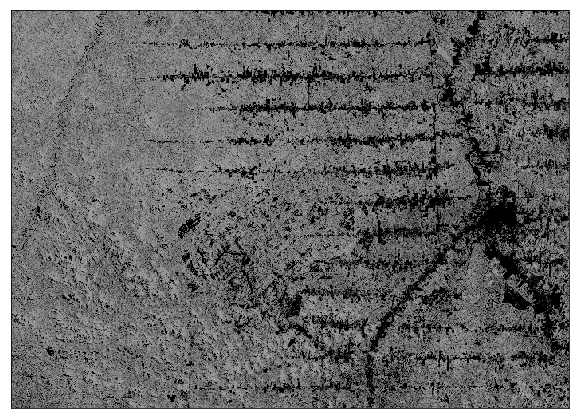

In [112]:
# Execute this code to test your function.
RGB_img = misc.imread('brazil_1985_Aug_rgb.png')
NIR_img = misc.imread('brazil_1985_Aug_nir.png')
NDVI_img = NDVI(RGB_img, NIR_img)
display(NDVI_img)

![](E7_Lab7_15.jpg)

### 2.2 Classifying Vegetation

Now, using the NDVI that we calculated, we want to map out how much of the forest is home to healthy vegetation. To do so, we will set a threshold on the NDVI, and then we'll use that threshold to decide whether or not a pixel represents healthy plant life. In fact, going from NDVI to a vegetation mapping like this is very similar to going from a grayscale image to a black-and-white one.

Write a function `vegetation_map(RGB_img, NIR_img, threshold, width)` that takes in two arrays `RGB_img` and `NIR_img`  as in the `NDVI` function you just wrote. It should calculate the NDVI for every pixel, and then use the threshold to decide whether there is healthy plant life there. More explicitly, it should decide there is healthy plant life if the `NDVI` of the pixel exceeds the `threshold`; othewise, it should decide there is no healthy plant life in the pixel. Your function should also take a parameter `width`, which is optional. If it is not specified, then return the percentage of the forest that is healthy, as well as an array representing the binary vegetation map. If `width` is provided, then return how many square kilometers in the forest are healthy, as well as an array representing the binary vegetation map. You can assume `width` is provided in kilometers.

*HINT: First build the array `img_veg` using conditions on the NDVI. In the case where there is an additional input `width`, use it to compute the real-world area of one pixel.*

In [132]:
def vegetation_map(RGB_img, NIR_img, threshold, width=None):
    complete_NDVI = NDVI(RGB_img, NIR_img)
    binary_NDVI = black_and_white(complete_NDVI, threshold)
    healthy_pixels = 0
    for row in binary_NDVI:
        for pixel in row:
            if pixel[0] == 255:
                healthy_pixels += 1
    total_size = len(binary_NDVI) * len(binary_NDVI[0])
    fraction_healthy = healthy_pixels / total_size
    if width == None:
        return 100 * fraction_healthy, binary_NDVI
    else:
        height = width * len(binary_NDVI) / len(binary_NDVI[0])
        return width * height * fraction_healthy, binary_NDVI

Run the cells below to test your function. It should match the images below.

Healthy Land: 84.00057142857142%, or 4741.958258000001 sq km


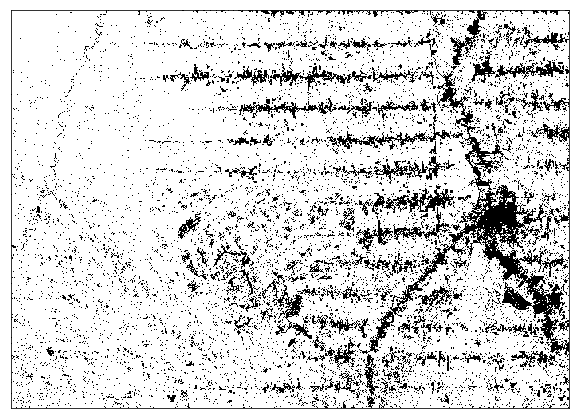

In [133]:
# Execute this code to test your function.
RGB_img = misc.imread('brazil_1985_Aug_rgb.png')
NIR_img = misc.imread('brazil_1985_Aug_nir.png')
healthy_percent, map_1985 = vegetation_map(RGB_img, NIR_img, 0.15)
healthy_square_km, map_1985 = vegetation_map(RGB_img, NIR_img, 0.15, 88.9)
print('Healthy Land: {0}%, or {1} sq km'.format(healthy_percent, healthy_square_km))
display(map_1985)

<center>$\texttt{Healthy Land: 84.00057142857142%, or 4741.958258000001 sq km}$</center>
![](E7_Lab7_16.jpg)

Healthy Land: 44.96485714285715%, or 2538.333633 sq km


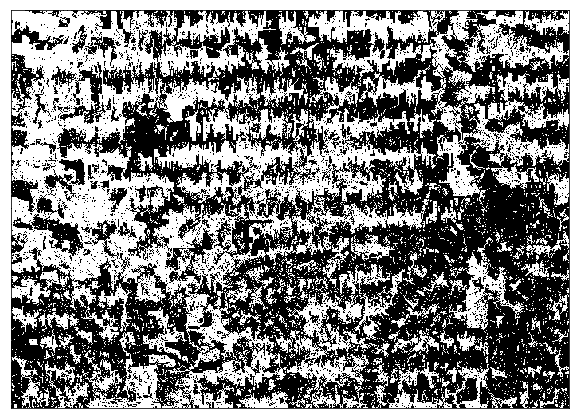

In [134]:
# Execute this code to test your function.
RGB_img = misc.imread('brazil_2015_Aug_rgb.png')
NIR_img = misc.imread('brazil_2015_Aug_nir.png')
healthy_percent, map_2015 = vegetation_map(RGB_img, NIR_img, 0.15)
healthy_square_km, map_2015 = vegetation_map(RGB_img, NIR_img, 0.15, 88.9)
print('Healthy Land: {0}%, or {1} sq km'.format(healthy_percent, healthy_square_km))
display(map_2015)

<center>$\texttt{Healthy Land: 44.96485714285715%, or 2538.333633 sq km}$</center>
![](E7_Lab7_17.jpg)

### 2.3: Tracking Changes over Time

Write a function `vegetation_change(RBG_img_1, NIR_img_1, RGB_img_2, NIR_img_2, threshold, width)` that takes in two sets of RGB and NIR images representing the same zone at different times. It should return the total vegetation change (expressed in km$^2$) between these pictures, given a NDVI threshold and the real-world width of the region. Assume image $1$ is the oldest one, so your function's output should return a positive value if there is more vegetation in image $2$ than in image $1$, and a negative value otherwise.

In [138]:
def vegetation_change(RGB_img_1, NIR_img_1, RGB_img_2, NIR_img_2, threshold, width):
    veg_area_1, veg_img_1 = vegetated_area(RGB_img_1, NIR_img_1, threshold, width)
    veg_area_2, veg_img_2 = vegetated_area(RGB_img_2, NIR_img_2, threshold, width)
    return veg_area_2 - veg_area_1

Run the cells below to test your function.

In [139]:
RGB_img_1 = misc.imread('brazil_1985_Aug_rgb.png')
NIR_img_1 = misc.imread('brazil_1985_Aug_nir.png')
RGB_img_2 = misc.imread('brazil_2015_Aug_rgb.png')
NIR_img_2 = misc.imread('brazil_2015_Aug_nir.png')
vegetation_change(RGB_img_1, NIR_img_1, RGB_img_2, NIR_img_2, 0.15, 88.9)

-2203.6246250000004

### 2.4 Further Exploration

You will also find two additional sets of images on bCourses that you can play with to check your functions: one of them illustrates the difference in snow cover in the Sierras between $2003$ and $2015$. Though it's not a perfect measurement, we can gauge how snow cover has changed based on how much vegetation is visible (more snow cover means less vegetation is visible). Since annual snow melt is one of the primary sources of water in California, these images help illustrate the water storage issues that have affected California in the past few years. These images have a width of $151.13$ km.

The other set of images shows the development of crops in Saudi Arabia between $1984$ and $2015$. The first set of images was taken before irrigation was allowed. Notice how much vegetation you see (it's a desert). The second image was taken after irrigation was made legal. The total horizontal width of these images is $30.48$ km.

## Question 3: Cellular Automata

A cellular automaton is an array of cells on a grid that evolves through a number of discrete time steps based upon a set of rules that depend on the state of neighboring cells. Even simple rules for deciding the "on" or "off" state of a cell can lead to complex and beautiful patterns. Cellular automata can be used to study the complexity found in nature, for example in snowflakes or mollusk shells.

Let's consider the simplest class of cellular automata (known as elementary cellular automata) in which an array contains a single row of $N$ cells, $x(1)$ through $x(N)$, each of which has a "state" of either "on", which is represented numerically by 1, or "off", which is represented numerically by 0. The array then evolves in a series of discrete time steps, $t_0, t_1, t_2, \dots, t_m$. At each time step $t_k$, the state of each cell $x_k(j)$ is determined based on its own state $x_{k-1}(j)$ in addition to the state of its two neighbors, $x_{k-1}(j - 1)$ and $x_{k-1}(j + 1)$, at the previous time step $t_{k-1}$. The states of $x_{k-1}(j - 1)$, $x_{k-1}(j)$, and $x_k-1(j + 1)$ form $3$ binary digits (bits), which can correspond to a base-$10$ integer of $0$ through $7$, which we refer to as the "neighbor state". For example, a cell has a neighbor state of $7$ ($111$) if in the previous time step it is on and both of its neighbors are on. If a cell is on but both of its neighbors are off, its neighbor state is $010$, or $2$. If a cell and both of its neighbors are off, then its neighbor state is $000$, or $0$.

At each time step, each cell is set to either "on" or "off" based on its neighbor state (a base-$10$ integer $0$ through $7$), and a "rule". The rule is defined by an $8$ bit binary number, with bits numbered $0$ to $7$. For example, if a cell has a neighbor state of $3$, then the rule number would be used to determine its next state; for this example, the next state is 1 if the $3$rd bit of the rule number is $1$, or $0$ if the $3$rd bit of the rule is $0$. Similarly, if a cell has a neighbor state of $5$, the next state is $1$ if the $5$th bit of the rule is $1$, or $0$ if the $5$th bit of the rule is $0$.

After $M$ time steps, the entire "history" of the array can be displayed in an $M$ x $N$ matrix of $0$s and $1$s, or an image of $M$ x $N$ pixels, where "on" pixels are represented by white and "off" pixels are represented by black. Examples using $30$ and $146$ as a rule are given below.

**Boundary conditions**: The neighbor state can be computed for all cells on the grid, except
those at the edge, which only have one neighbor. In order to determine the neighbor state
for the cells on the edge, we must define boundary conditions. For this assignment, you will
consider the cells that are off the grid to be permanently "off". This will be important when
computing any cells near the edges.

**Examples: Rule $30$ and Rule $146$**
The number $30$ is $00011110$ in binary and $146$ is $10010010$. At each time step, the new state of every cell is determined by its current neighbor state according to the following table:

| state | 
|--------------------------------------------------------------------------|
| neighbor state in base 10 | 7 | 6 | 5 | 4 | 3 | 2 | 1 | 0 |
| neighbor state in binary | 111 | 110 |  101 | 100 | 011 | 010 | 001 | 000 |
| new state using rule 30 | 0 | 0  | 0  |1 | 1 | 1 | 1 | 0 |
| new state using rule 146 | 1 | 0 | 0 | 1 | 0 | 0 | 1 | 0 |

Thus, for rule $30$ if the neighbor state is $3$ ($011$), the state of the current cell will be the $3^{rd}$
bit of rule $30$, which is $1$. For rule $146$, if the neighbor state is $3$, the state of the current cell
will be $0$.

### 3.1: `run_automata`

We start out with a row which has a single "on" cell in the center and all the rest all "off". Here's what happens in the first three time steps of rule $30$.

| timestep | 
|--------------|---|---|---|---|---|---|---|
| timestep, t0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 |
| timestep, t1 | 0 | 0 | 1 | 1 | 1 | 0 | 0 |
| timestep, t2 | 0 | 1 | 1 | 0 | 0 | 1 | 0 |
| timestep, t3 | 1 | 1 | 0 | 1 | 1 | 1 | 1 |

In Python we can convert a matrix of $0$ and $1$ into an image using `imshow`. If we run rule $30$ for a couple hundred time steps, an irregular pattern emerges. Shown below is the image produced by Python for the first $200$ steps of rule $30$ and rule $146$.

![](E7_Lab7_18.jpg)
<center>The first $200$ steps of rule $30$</center>

Your job is to write a function `run_automata(rule, step)` that will generate these patterns.

![](E7_Lab7_19.jpg)
<center> The first $200$ steps of rule $146$</center>

Your function accepts two input arguments: the rule number, and the number of steps. It should return the corresponding $M$ x $N$ binary matrix generated by the cellular automaton. You should assume the first row (given by time step t0) is all $0$s except for a single $1$ at the center. This is followed by a new row for each time step in the automaton. If there are $N$ steps, then there should be $N + 1$ rows and $2N + 1$ columns in the result matrix.

In [142]:
def run_automata(rule, n_steps):
    states_array = []
    rule = np.binary_repr(30)
    rule = '0' * (8 - len(rule)) + rule
    def next_state(state):
        next_state = ''
        for state_l, state_m, state_r in zip('0' + state[:-1], state, state[1:] + '0'):
            seed = 4 * int(state_l) + 2 * int(state_m) + 1 * int(state_r)
            new_bit = rule[7 - seed]
            next_state += new_bit
        return next_state
    state = '0' * n_steps + '1' + '0' * n_steps
    states_array.append(state)
    while n_steps:
        state = next_state(state)
        states_array.append(state)
        n_steps -= 1
    return states_array

In [145]:
# Execute this code to test your function.
print('Your cellular automaton:')
for state in run_automata(30, 3):
    print(state)
print('\nThe correct cellular automaton:')
print('0001000')
print('0011100')
print('0110010')
print('1101111')

Your cellular automaton:
0001000
0011100
0110010
1101111

The correct cellular automaton:
0001000
0011100
0110010
1101111


In [147]:
# Execute this code to test your function.
print('Your cellular automaton:')
for state in run_automata(146, 10):
    print(state)
print('\nThe correct cellular automaton:')
print('000000000010000000000')
print('000000000111000000000')
print('000000001100100000000')
print('000000011011110000000')
print('000000110010001000000')
print('000001101111011100000')
print('000011001000010010000')
print('000110111100111111000')
print('001100100011100000100')
print('011011110110010001110')
print('110010000101111011001')

Your cellular automaton:
000000000010000000000
000000000111000000000
000000001100100000000
000000011011110000000
000000110010001000000
000001101111011100000
000011001000010010000
000110111100111111000
001100100011100000100
011011110110010001110
110010000101111011001

The correct cellular automaton:
000000000010000000000
000000000111000000000
000000001100100000000
000000011011110000000
000000110010001000000
000001101111011100000
000011001000010010000
000110111100111111000
001100100011100000100
011011110110010001110
110010000101111011001
